#**Stock Market Analysis**

The aim of this project is to develop a robust predictive model to forecast Apple Inc.'s stock market prices over a 30-day period. The dataset provided (AAPL.csv) encompasses daily trading data from 2012 to 2019, including key metrics such as open, high, low, and close prices. This comprehensive dataset forms the foundation for detailed analyses of both short-term and long-term market trends, facilitating a rigorous evaluation of the model's performance. Ultimately, the project seeks to generate accurate and actionable insights to support strategic investment decisions.

# **1. EDA**

In [2]:
!pip install pmdarima # for automatically determining the best ARIMA parameters.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.8 MB/s eta 0:00:00


In [3]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pmdarima as pm

In [4]:
# Load dataset
df = pd.read_csv("AAPL.csv", parse_dates=["Date"], index_col="Date")
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [5]:
#Convert 'Date' column to datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

- Converting the 'Date' column to datetime format ensures that the data is recognized as time-based, allowing for accurate sorting, filtering, and resampling. This is crucial for effective time-series analysis and visualization in stock market studies.

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [8]:
df.shape

(2011, 6)

In [9]:
df.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


In [11]:
df.describe()  #Getting summary statistics of numerical columns

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [12]:
df.isnull().sum()    #checking missing values

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [13]:
#Checking for duplicate rows
df.duplicated().sum()

0

In [14]:
#Define numeric columns (Open, High, Low, Close, Volume)

numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

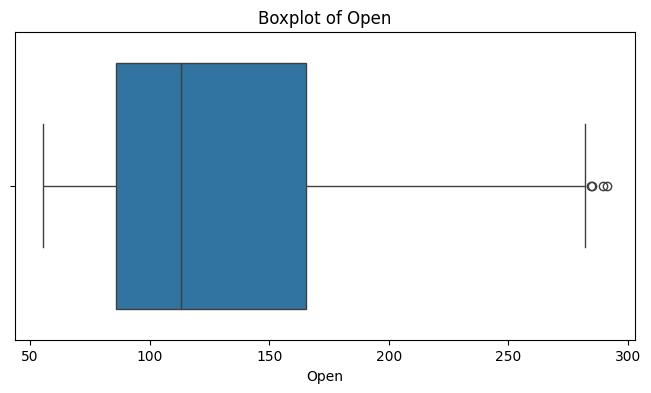

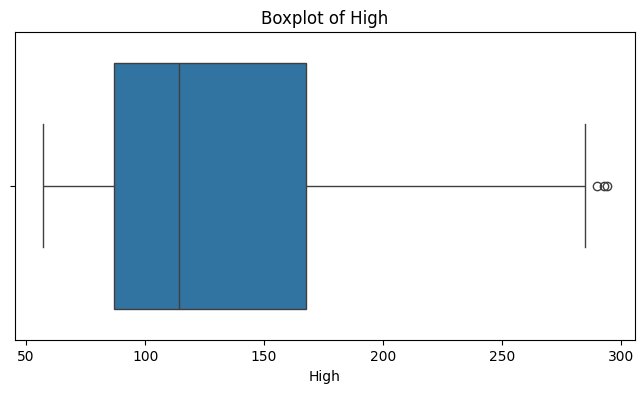

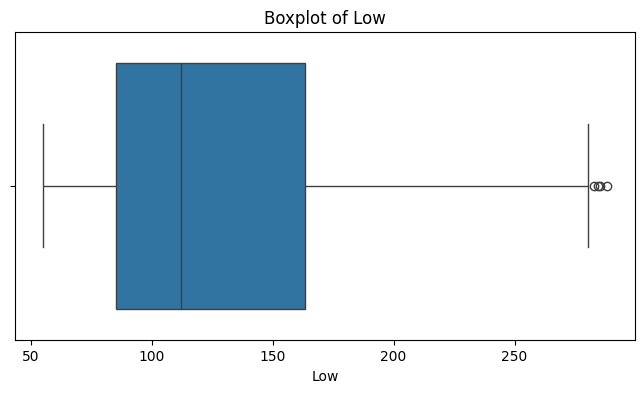

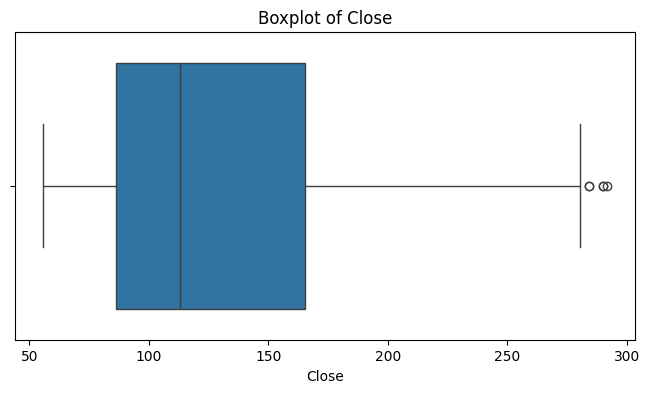

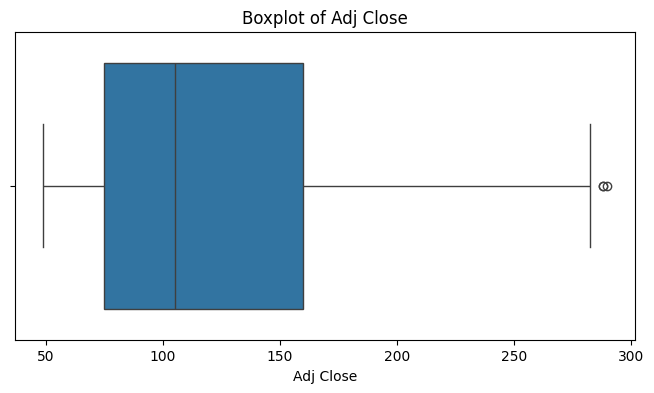

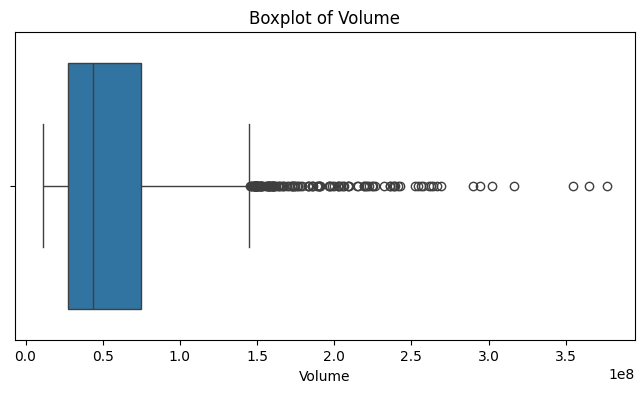

In [15]:
#Boxplots for each numeric attribute to detect outliers

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [16]:
#Handling outliers by replacing them with the upper and lower bounds (Winsorization)

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

    return df

#Apply outlier handling on each numerical column
for column in numeric_columns:
    df = handle_outliers(df, column)

In [17]:
df.shape  #shape remains unchanged after handling outliers

(2011, 6)

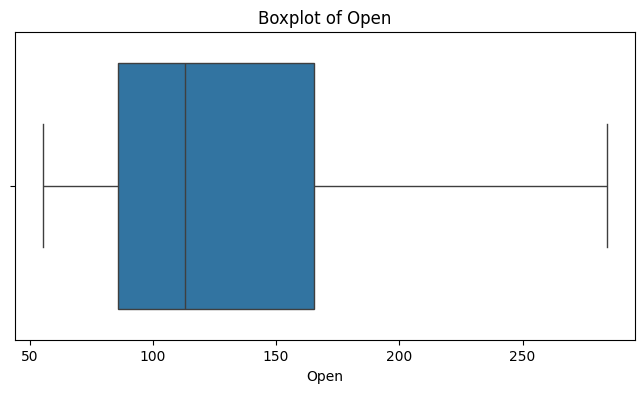

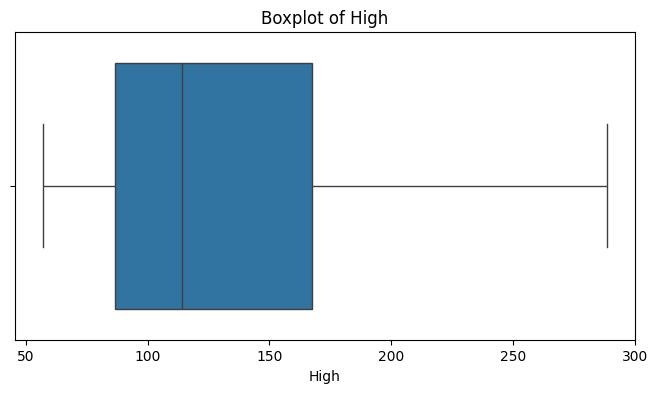

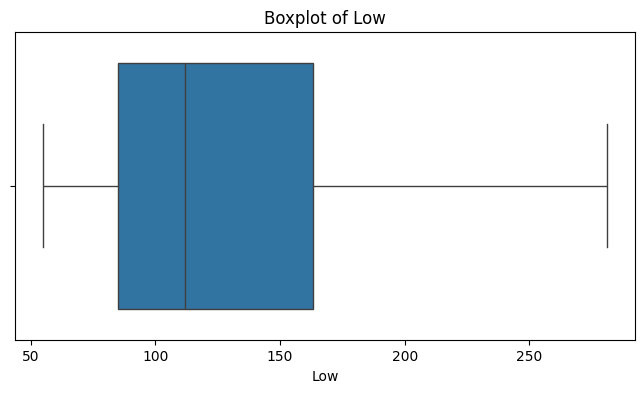

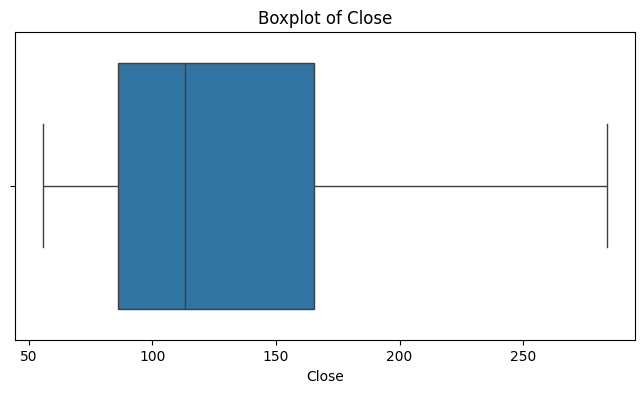

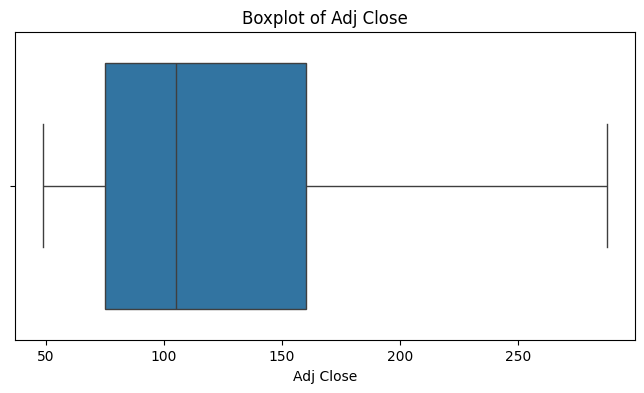

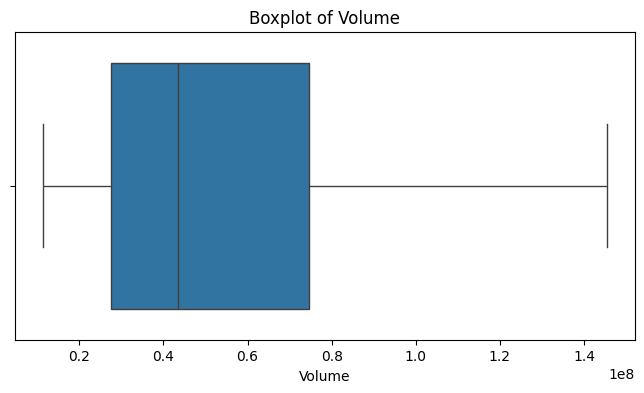

In [18]:
#Boxplots after handling outliers

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

# **2. Visualization**

In [19]:
#Set visualization styles

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["legend.fontsize"] = 12

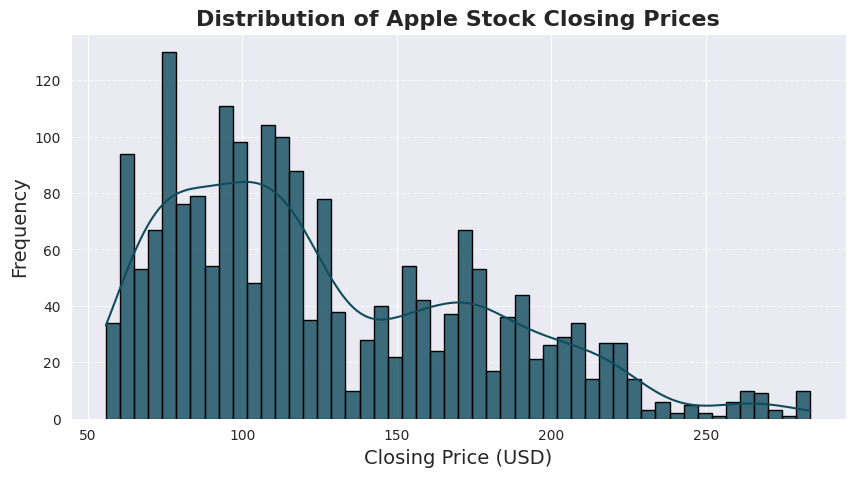

In [20]:
#1.Distribution of Closing Prices

plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], bins=50, kde=True, color='#0f4c5c', edgecolor='black', alpha=0.8)
plt.title('Distribution of Apple Stock Closing Prices', fontsize=16, fontweight='bold')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- The distribution of Apple’s closing prices shows a right-skewed trend, indicating a gradual increase in stock value over time.

- The high concentration of prices in the upper range suggests consistent long-term growth, while the presence of a tail highlights occasional price drops due to market corrections or external factors.

- The KDE curve further confirms that most closing prices have stabilized within a certain range, making trend-based forecasting more reliable.

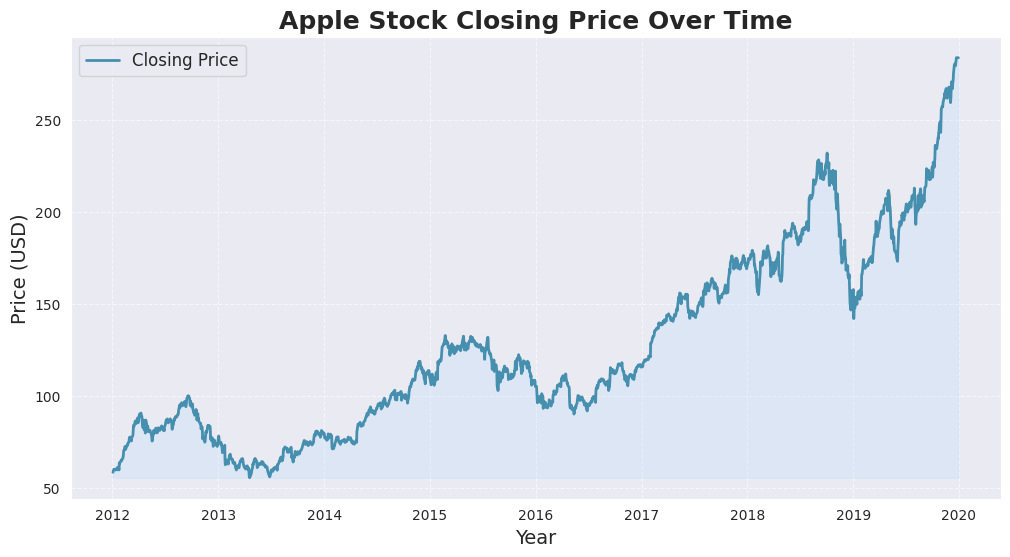

In [21]:
#2.Closing Price Over Time with Trend

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='#468faf', linewidth=2)
plt.fill_between(df.index, df['Close'].min(), df['Close'], color='#bde0fe', alpha=0.3)
plt.title('Apple Stock Closing Price Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

- The time-series plot shows a clear upward trend in Apple’s stock price, with occasional sharp declines likely corresponding to market corrections or external factors like earnings reports.

- The price fluctuations indicate periods of volatility, but overall, the long-term trajectory remains positive, supporting the feasibility of trend-based stock price forecasting.

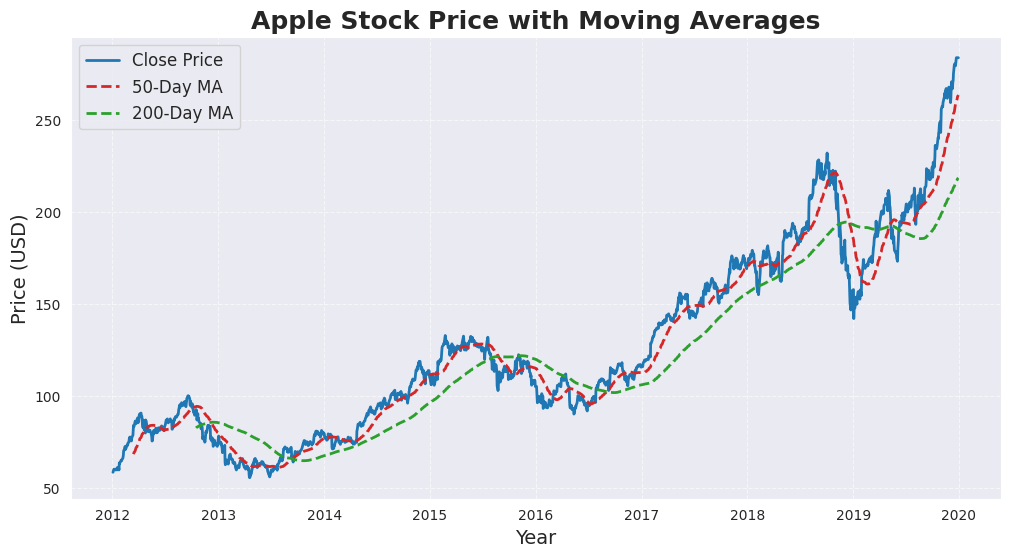

In [22]:
#3.Moving Averages for Short-Term and Long-Term Trends

df['50-Day MA'] = df['Close'].rolling(window=50).mean()
df['200-Day MA'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='#1f77b4', linewidth=2)
plt.plot(df.index, df['50-Day MA'], label='50-Day MA', color='#d62728', linestyle='dashed', linewidth=2)
plt.plot(df.index, df['200-Day MA'], label='200-Day MA', color='#2ca02c', linestyle='dashed', linewidth=2)
plt.title('Apple Stock Price with Moving Averages', fontsize=18, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

- The moving averages indicate Apple’s stock stability and momentum shifts, with the **50-day MA** reacting to short-term trends and the **200-day MA** reflecting broader market sentiment.

- Bullish crossovers suggest potential buying opportunities, while bearish crossovers warn of possible declines.
- The steady upward movement of both MAs reinforces Apple’s long-term growth, making it a strong candidate for trend-based investment strategies.

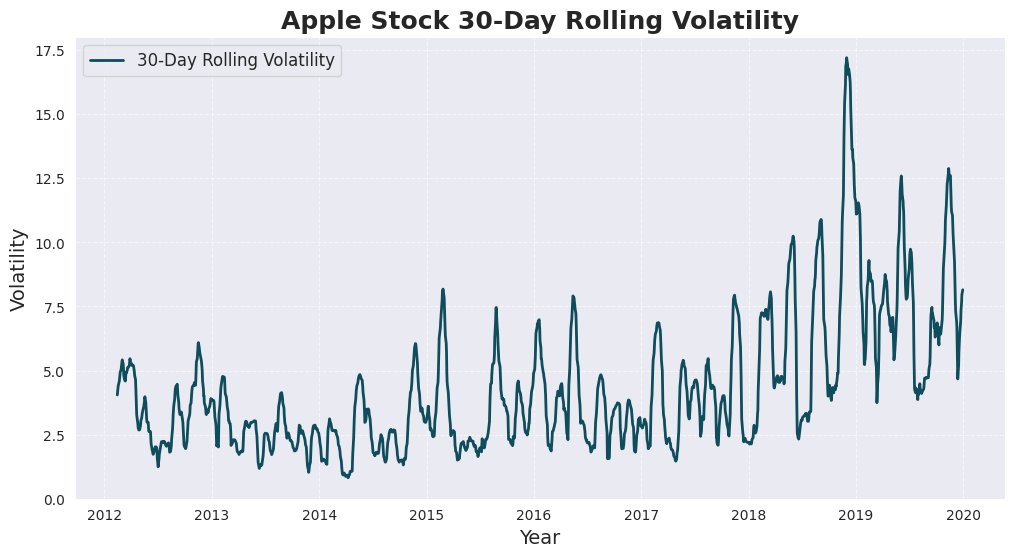

In [23]:
#4.Rolling Volatility to Analyze Market Fluctuations

df['Rolling Volatility'] = df['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rolling Volatility'], label='30-Day Rolling Volatility', color='#0f4c5c', linewidth=2)
plt.title('Apple Stock 30-Day Rolling Volatility', fontsize=18, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

- The **30-day rolling volatility** highlights periods of increased market uncertainty and stability in Apple’s stock.
- Spikes in volatility often align with major economic events, earnings reports, or external shocks, signaling potential risk.
- Periods of low volatility suggest price stability, making them favorable for long-term investors.
- Understanding these fluctuations helps in optimizing trading strategies by identifying high-risk and low-risk periods.

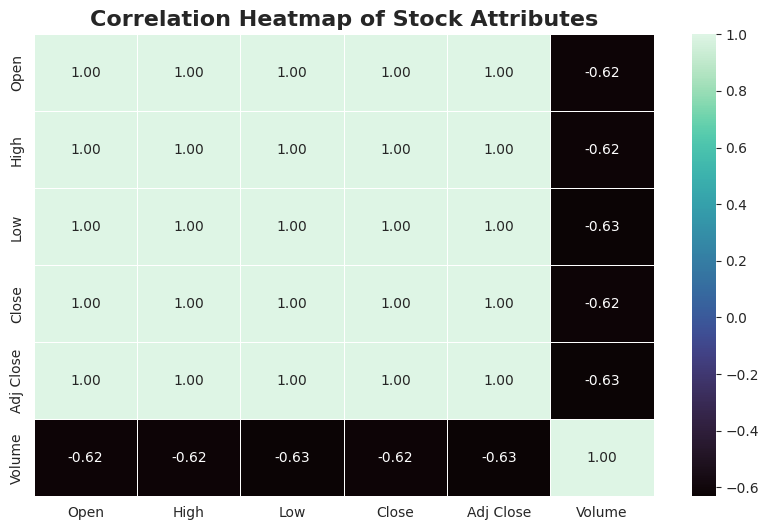

In [24]:
#5.Correlation Heatmap (Short-term and Long-term price movements)

plt.figure(figsize=(10, 6))
corr_matrix = df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='mako', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Stock Attributes', fontsize=16, fontweight='bold')
plt.show()

 - The correlation heatmap shows a **strong positive relationship** between Open, High, Low, and Close prices, confirming that these attributes move together in the same direction.
 - Volume has a weaker correlation with closing price, indicating that trading activity alone does not heavily influence price fluctuations.

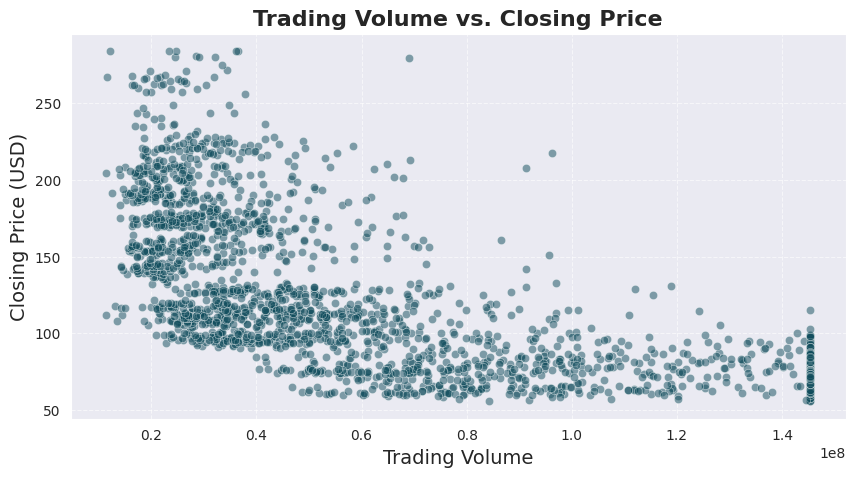

In [25]:
#6.Volume vs. Closing Price Scatter Plot to analyze impact

if 'Volume' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df['Volume'], y=df['Close'], alpha=0.5, color='#0f4c5c')
    plt.title('Trading Volume vs. Closing Price', fontsize=16, fontweight='bold')
    plt.xlabel('Trading Volume')
    plt.ylabel('Closing Price (USD)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

- The scatter plot indicates that **trading volume does not have a strong direct impact on closing prices**, as there is no clear trend between the two variables.
- occasional spikes in volume coincide with significant price movements, suggesting that external factors such as earnings reports, market sentiment, or news events may drive both volume surges and price changes.

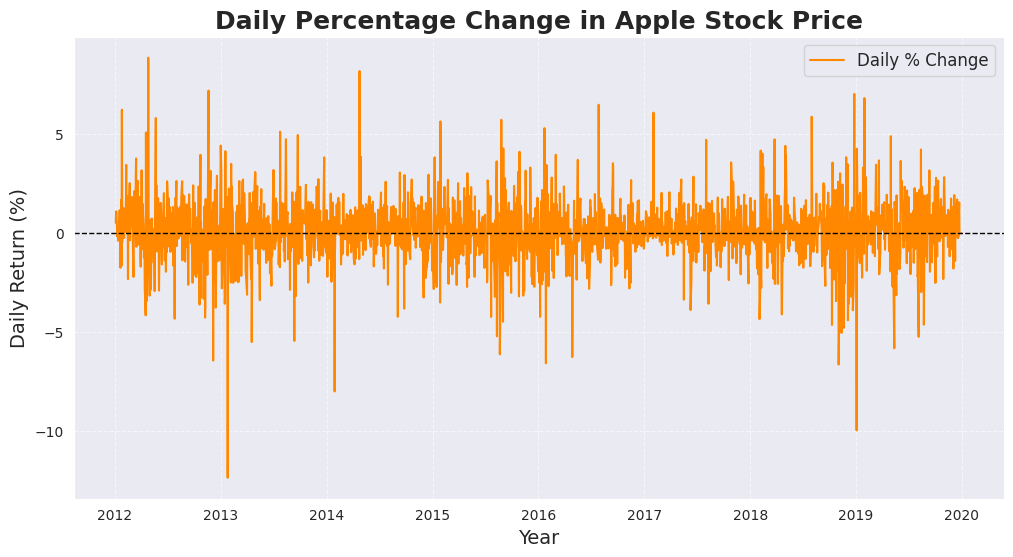

In [26]:
#7.Percentage Change to Detect Trends in Stock Growth

df['Daily Return'] = df['Close'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Daily Return'], label='Daily % Change', color='#ff8800', linewidth=1.5)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Daily Percentage Change in Apple Stock Price', fontsize=18, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

- The **daily percentage change** plot highlights Apple’s stock volatility, with frequent small fluctuations and occasional sharp spikes.
- These extreme movements often align with major market events, earnings releases, or economic shifts.
- The presence of both positive and negative swings indicates short-term trading opportunities, while the overall trend stability suggests that long-term investors can focus on broader market patterns rather than daily fluctuations.

In [27]:
# Ensure 'Date' is set as index (to avoid resampling errors)
if df.index.dtype != 'datetime64[ns]':
    df.set_index('Date', inplace=True)


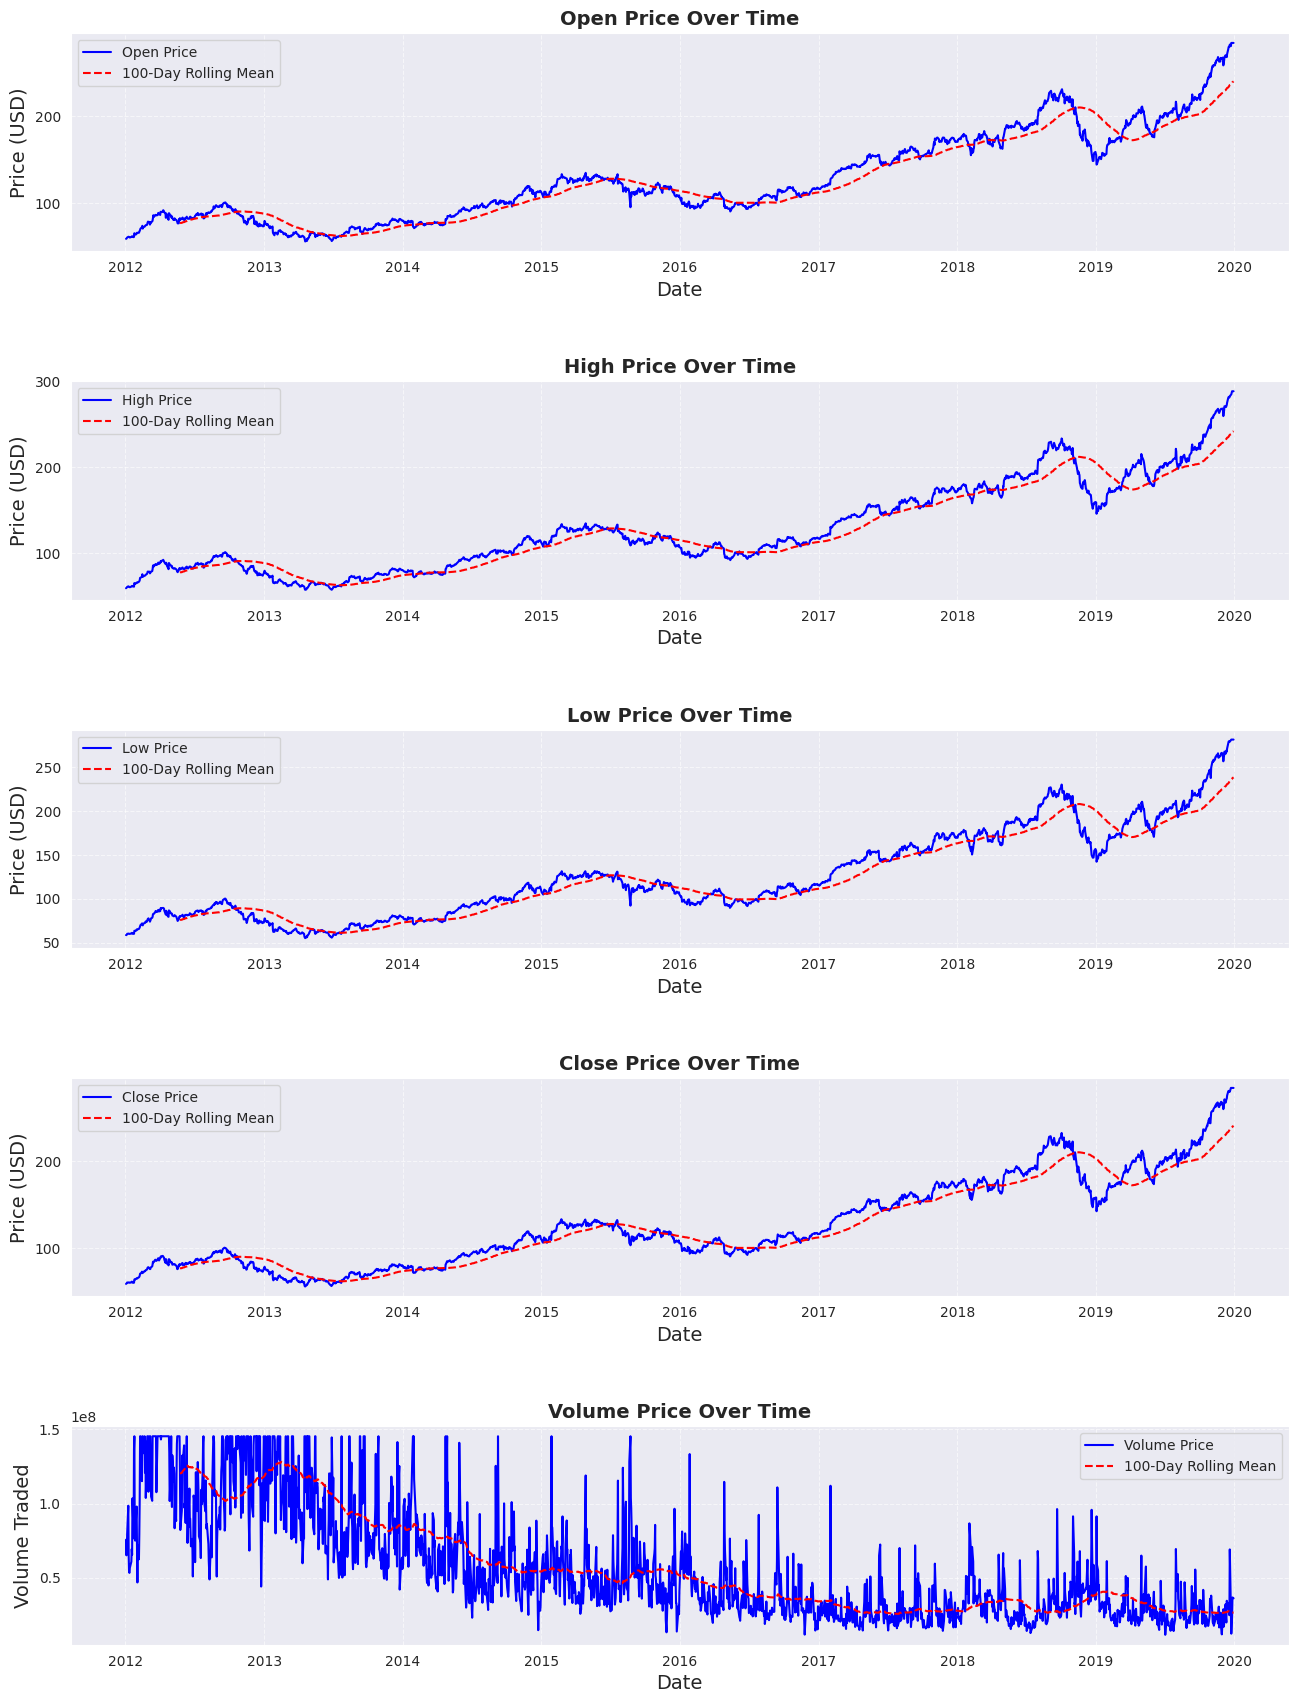

In [28]:
#8.Price Over the Years

# Define stock attributes to plot
col_names = ['Open', 'High', 'Low', 'Close', 'Volume']

fig = plt.figure(figsize=(14, 18))

for i, col in enumerate(col_names):
    ax = fig.add_subplot(len(col_names), 1, i+1)
    ax.plot(df[col], label=f'{col} Price', color='blue')
    ax.plot(df[col].rolling(100).mean(), label='100-Day Rolling Mean', color='red', linestyle='dashed')

    ax.set_title(f"{col} Price Over Time", fontsize=14, fontweight='bold')
    ax.set_xlabel("Date")
    ax.set_ylabel("Price (USD)" if col != 'Volume' else "Volume Traded")
    ax.legend(fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.patch.set_edgecolor('black')

# Apply style & adjust layout
plt.style.use('fivethirtyeight')
fig.tight_layout(pad=3.0)
plt.show()


In [29]:
# CALCULATING MONTHLY MEAN
monthly_data = df['Close'].resample('M').mean().to_frame()

# Adding additional time-based features
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['Quarter'] = monthly_data.index.quarter

<ipython-input-29-26a18d3a4de2>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['Close'].resample('M').mean().to_frame()


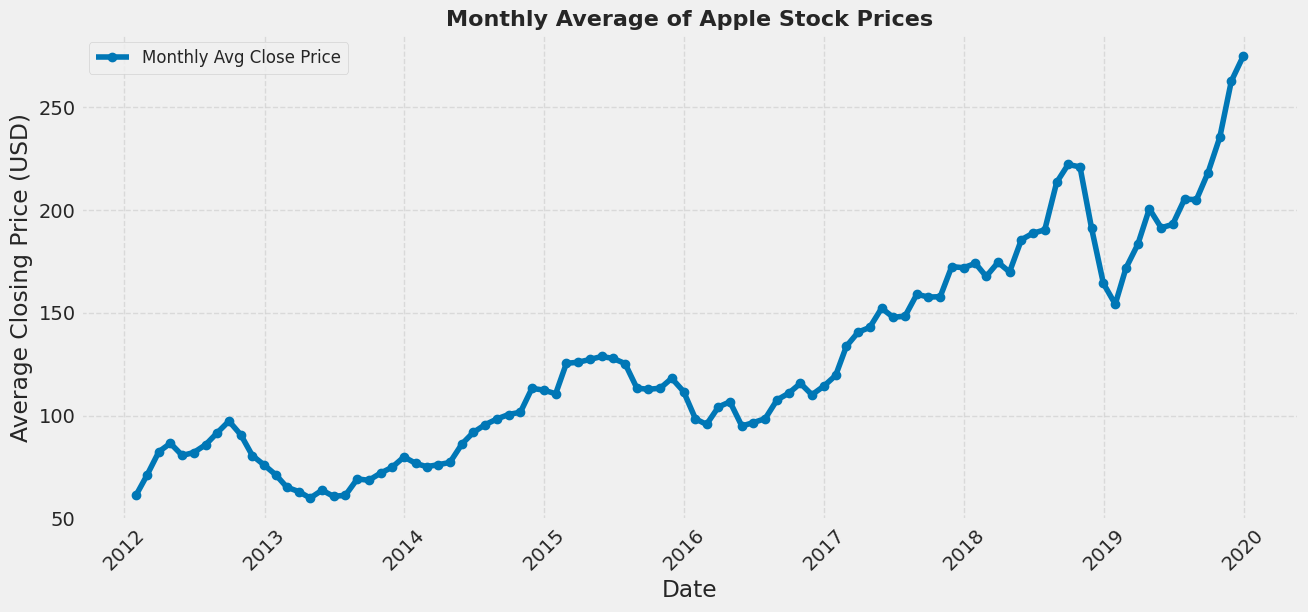

In [30]:
#9.Monthly Average of Apple Stock Prices

plt.figure(figsize=(14, 6))
plt.plot(monthly_data.index, monthly_data['Close'], marker='o', linestyle='-', color='#0077b6', label='Monthly Avg Close Price')
plt.title("Monthly Average of Apple Stock Prices", fontsize=16, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Average Closing Price (USD)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.style.use('fivethirtyeight')
plt.show()

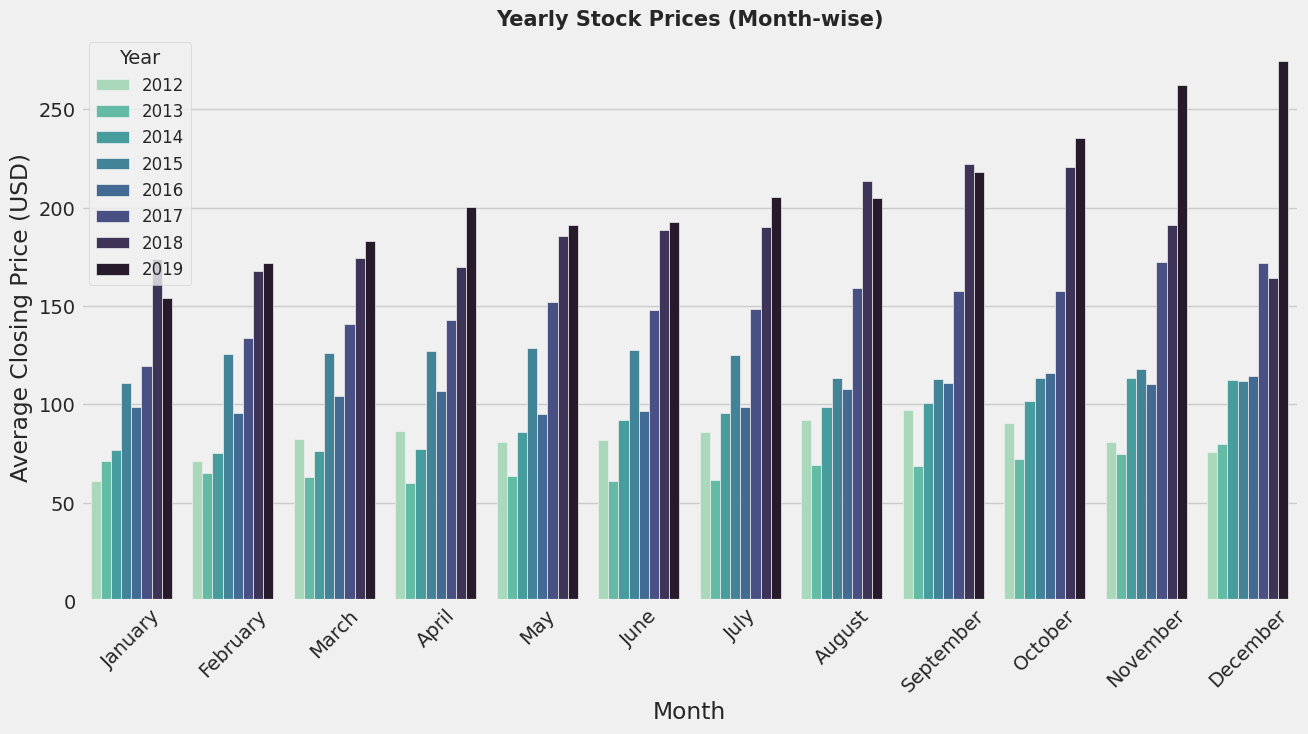

In [31]:
#10.Yearly Stock Prices (Month-wise)

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
fig, ax = plt.subplots(figsize=(14, 7))
palette = sns.color_palette("mako_r", n_colors=monthly_data['Year'].nunique())
sns.barplot(x="Month", y="Close", hue="Year", data=monthly_data, order=month_order, palette=palette)
ax.set_title("Yearly Stock Prices (Month-wise)", fontsize=15, fontweight='bold')
ax.set_xlabel("Month")
ax.set_ylabel("Average Closing Price (USD)")
plt.xticks(rotation=45)
plt.legend(title="Year", loc='upper left')

plt.show()


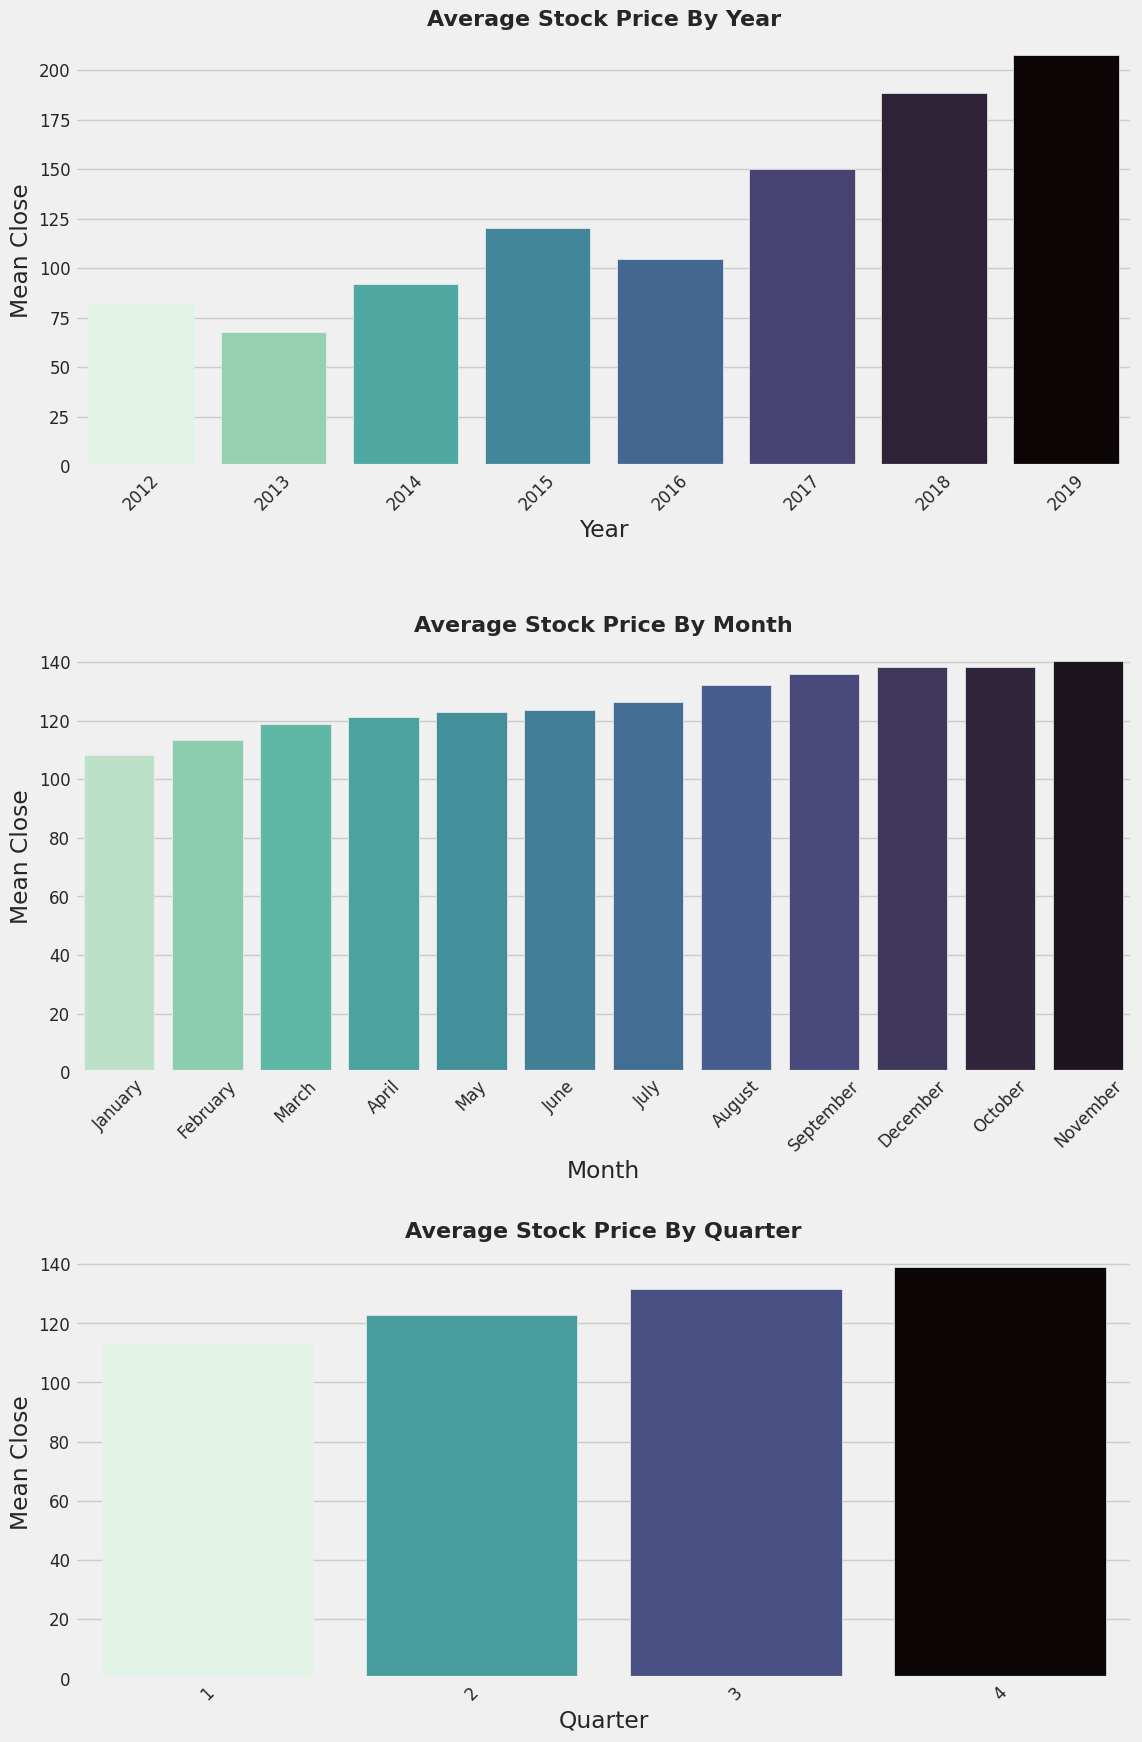

In [32]:
#11.Average Stock Price By "Year", "Month", "Quarter"

fig = plt.figure(figsize=(12, 18))
group_cols = ["Year", "Month", "Quarter"]

for enum, i in enumerate(group_cols):
    ax = fig.add_subplot(3, 1, enum + 1)
    aggregated = monthly_data.groupby(i)["Close"].mean().reset_index().sort_values("Close")
    sns.barplot(data=aggregated, x=i, y="Close", hue=i, ax=ax, dodge=False, legend=False, palette="mako_r")
    ax.set(xlabel=i, ylabel="Mean Close")
    ax.set_title(f"Average Stock Price By {i}", fontsize=16, fontweight="bold")
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout(pad=2)
plt.show()


# **3. Data Preprocessing**

In [33]:
# to resample 'df' to daily frequency:
resampled = df.resample('D').mean()

In [34]:
# Splitting the dataset
train = resampled.loc[resampled.index <= '2018-12-31']
test = resampled.loc[resampled.index > '2018-12-31']

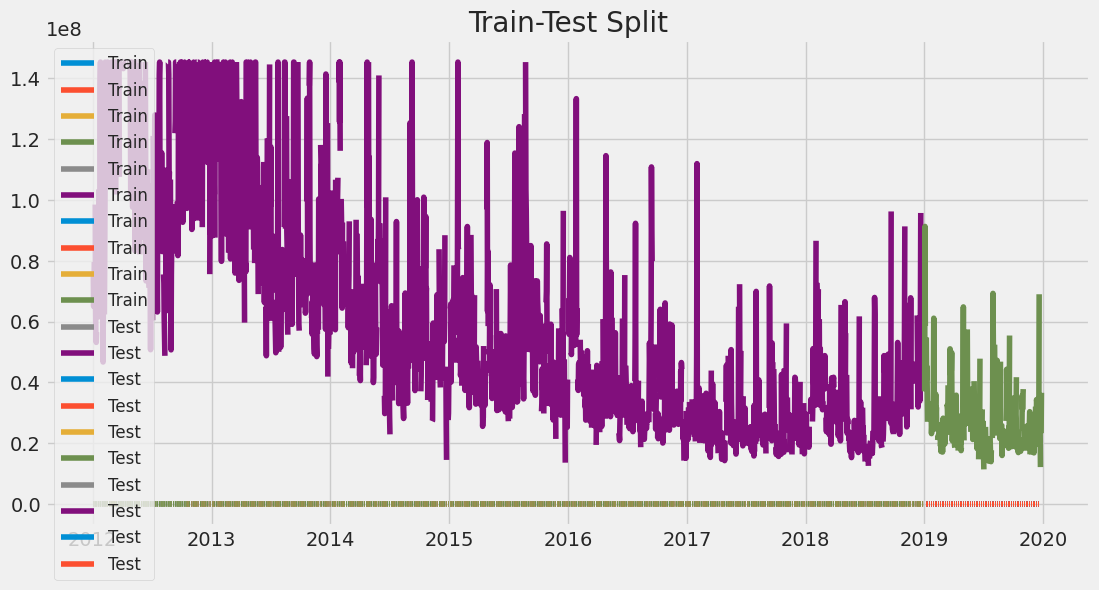

In [35]:
# Visualize the train-test split
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.legend()
plt.title("Train-Test Split")
plt.show()

In [36]:
# Check for missing values in the training and testing data
print(train['Close'].isnull().sum())  #  any NaNs in train
print(test['Close'].isnull().sum())   # any NaNs in test

795
113


In [37]:
# Handle missing values in 'Close' column
train['Close'] = train['Close'].fillna(method='ffill')
test['Close'] = test['Close'].fillna(method='ffill')

<ipython-input-37-644b9d765dd0>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train['Close'] = train['Close'].fillna(method='ffill')
<ipython-input-37-644b9d765dd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Close'] = train['Close'].fillna(method='ffill')
<ipython-input-37-644b9d765dd0>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test['Close'] = test['Close'].fillna(method='ffill')
<ipython-input-37-644b9d765dd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [38]:
# Prepare data for time series models
X_train = train.index  # Date as independent variable
y_train = train['Close']  # Close as dependent variable
X_test = test.index  # Date as independent variable
y_test = test['Close']  # Close as dependent variable

# **Model building**

1. ARIMA Model

In [39]:
# 1. ARIMA Model (Auto ARIMA for best parameters)
arima_model = pm.auto_arima(y_train, seasonal=False, stepwise=True, trace=True)
arima_forecast = arima_model.predict(n_periods=len(y_test))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9621.060, Time=4.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9625.424, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9627.423, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9627.423, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9624.939, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9627.525, Time=1.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9627.302, Time=3.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9618.010, Time=6.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9624.069, Time=1.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=9618.843, Time=7.78 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=9618.649, Time=7.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=9617.891, Time=6.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=9624.569, Time=1.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=9618.687, Time=10.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=9625.769, Time=2.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=9621.199, Time=10.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=9617.375, Time=2.80 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=9623.980, Time=0.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=9620.673, Time=1.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=9617.815, Time=3.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0]             : AIC=9618.231, Time=5.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=9627.098, Time=0.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0]             : AIC=9625.168, Time=0.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=9617.496, Time=2.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0]             : AIC=9620.676, Time=3.06 sec

Best model:  ARIMA(2,1,3)(0,0,0)[0]          
Total fit time: 85.742 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2. SARIMA Model

In [40]:
# 2. SARIMA Model (Auto ARIMA for best seasonal parameters)
sarima_model = pm.auto_arima(y_train, seasonal=True, m=12, stepwise=True, trace=True)
sarima_forecast = sarima_model.predict(n_periods=len(y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=9615.780, Time=19.41 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=9625.424, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=9625.819, Time=1.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=9625.533, Time=1.50 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=9624.939, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=9621.193, Time=8.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=9621.350, Time=9.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=9617.276, Time=47.98 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=9617.366, Time=27.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=9621.060, Time=6.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=9619.356, Time=28.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=9619.833, Time=27.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=9618.352, Time=45.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=9621.123, Time=5.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=9620.888, Time=7.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,1)[12] intercept   : AIC=9613.751, Time=16.83 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=9618.409, Time=10.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=9618.559, Time=11.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,0,1)[12] intercept   : AIC=9614.804, Time=31.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,2)[12] intercept   : AIC=9614.862, Time=27.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=9618.010, Time=8.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=9616.870, Time=14.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,0,0)[12] intercept   : AIC=9617.396, Time=14.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,0,2)[12] intercept   : AIC=9616.818, Time=49.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,0,1)[12] intercept   : AIC=9616.563, Time=7.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(1,0,1)[12] intercept   : AIC=9615.686, Time=20.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,1)[12] intercept   : AIC=9615.701, Time=18.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,1)[12] intercept   : AIC=9613.807, Time=17.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(1,0,1)[12] intercept   : AIC=9617.404, Time=12.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(1,0,1)[12] intercept   : AIC=9617.673, Time=22.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,1)[12]             : AIC=9613.823, Time=7.46 sec

Best model:  ARIMA(3,1,2)(1,0,1)[12] intercept
Total fit time: 526.660 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


3. Simple Exponential Smoothing

In [41]:
# 3. Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(y_train, initialization_method="estimated")
ses_fitted = ses_model.fit(smoothing_level=0.2, optimized=False)
ses_forecast = ses_fitted.forecast(steps=len(y_test))

4. Holt's Method

In [42]:
# 4. Holt's Method
holt_model = Holt(y_train, initialization_method="estimated")
holt_fitted = holt_model.fit(smoothing_level=0.2, smoothing_trend=0.1)
holt_forecast = holt_fitted.forecast(steps=len(y_test))

5. Linear Regression

In [43]:
# 5. Linear Regression (using date as numerical feature)
X_train_num = [(d - X_train.min()).days for d in X_train]
X_test_num = [(d - X_train.min()).days for d in X_test]

linear_model = LinearRegression()
linear_model.fit(np.array(X_train_num).reshape(-1, 1), y_train)
linear_forecast = linear_model.predict(np.array(X_test_num).reshape(-1, 1))

# **5. Model Evaluation**

In [52]:
print(f"{model_name} Forecast NaN values: {np.isnan(forecast).sum()}")

Linear Regression Forecast NaN values: 0


In [46]:
forecast = forecast.fillna(0)  # Replace NaN values with 0


In [47]:
print(f"y_test NaN values: {y_test.isnull().sum()}")
y_test = y_test.fillna(0)

y_test NaN values: 1


ARIMA RMSE: 61.05035430549703
ARIMA MAE: 50.923908290485706


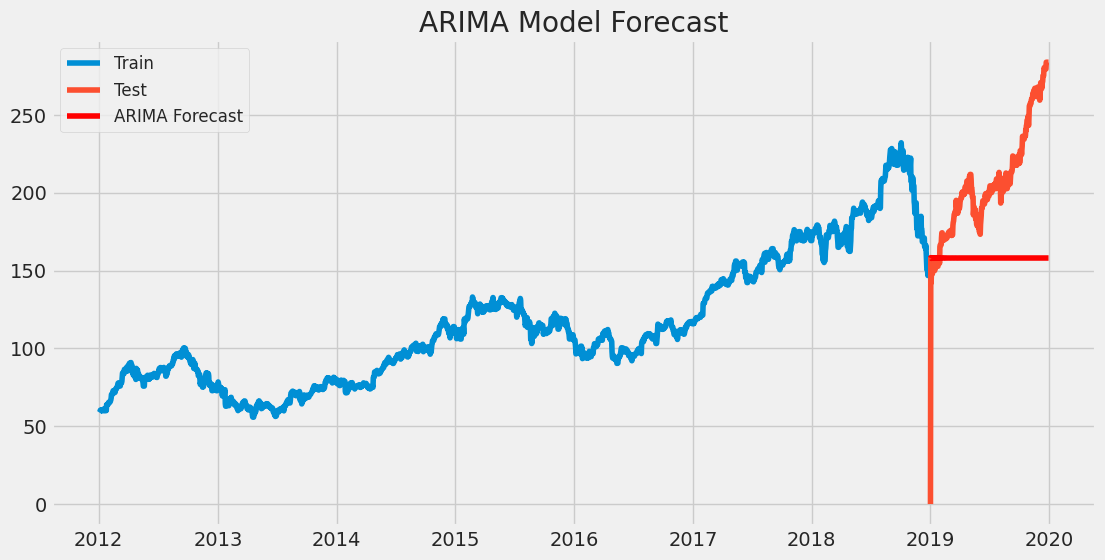

SARIMA RMSE: 50.018520653928476
SARIMA MAE: 40.534072666058734


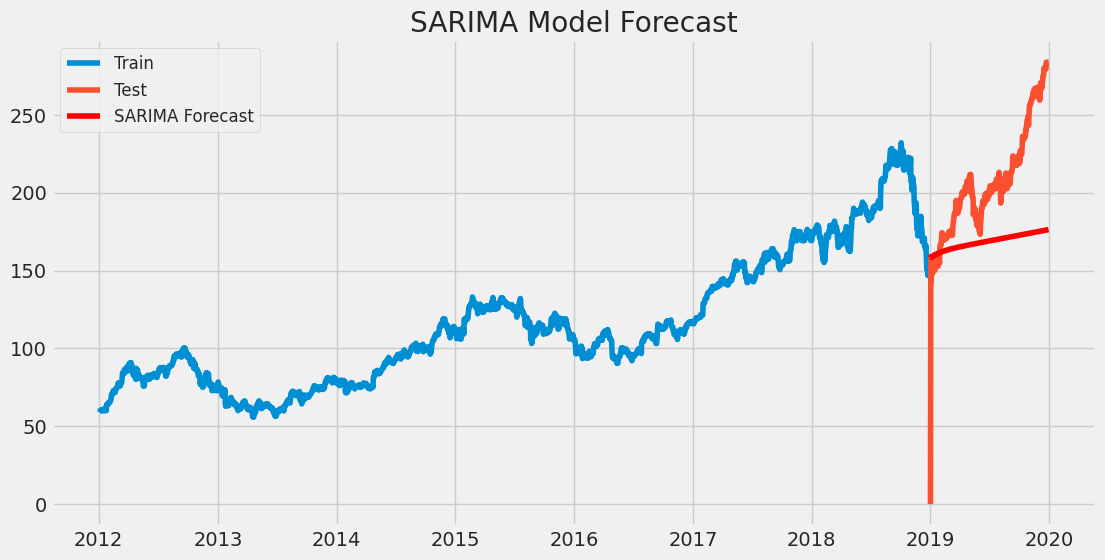

SES RMSE: 62.77516842196433
SES MAE: 52.76705309144893


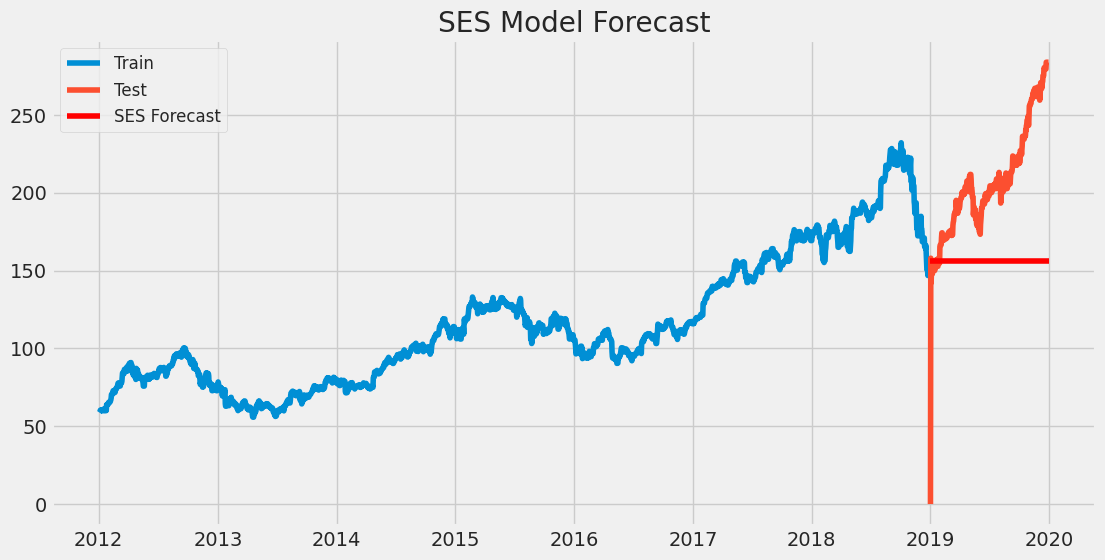

Holt RMSE: 185.00470076951464
Holt MAE: 160.31206114462674


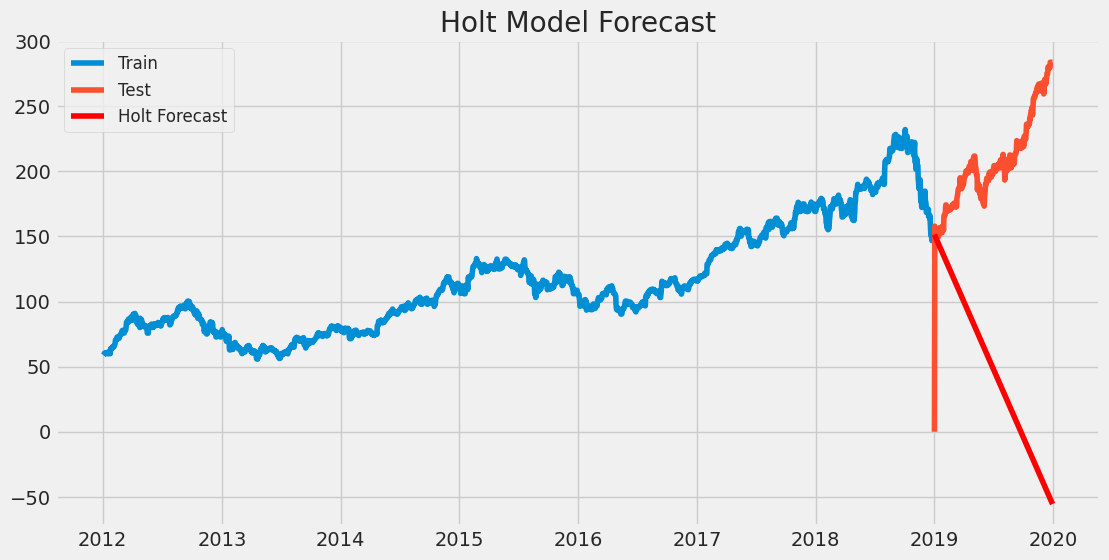

Linear Regression RMSE: 37.6671026870968
Linear Regression MAE: 28.089299011962392


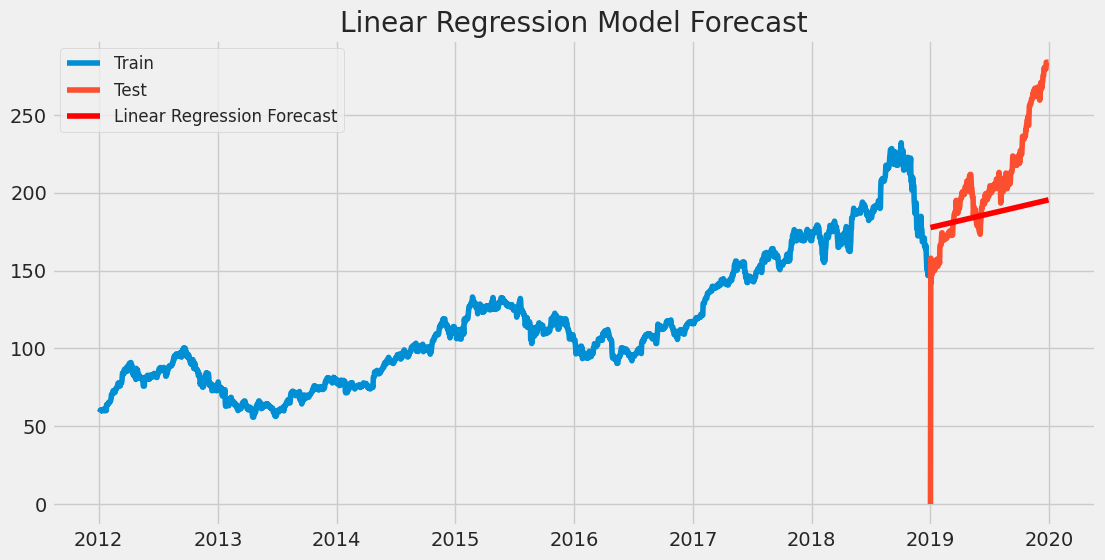

In [48]:
# Evaluate and plot results for each model
models = {
    "ARIMA": arima_forecast,
    "SARIMA": sarima_forecast,
    "SES": ses_forecast,
    "Holt": holt_forecast,
    "Linear Regression": linear_forecast
}

for model_name, forecast in models.items():
    rmse = np.sqrt(mean_squared_error(y_test, forecast))
    mae = mean_absolute_error(y_test, forecast)  # Calculate MAE
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} MAE: {mae}")  # Print MAE

    plt.figure(figsize=(12, 6))
    plt.plot(X_train, y_train, label='Train')
    plt.plot(X_test, y_test, label='Test')
    plt.plot(X_test, forecast, label=f'{model_name} Forecast', color='red')
    plt.legend()
    plt.title(f"{model_name} Model Forecast")
    plt.show()

**Best Model for Deployment:**

Linear Regression has the lowest RMSE (37.66) and lowest MAE (28.08) compared to all the other models, which indicates it is the best-performing model in terms of accuracy and error minimization. This makes it the most reliable model for forecasting the Close values.


SARIMA is also quite good, with an RMSE of 50.22 and MAE of 40.62, but the Linear Regression model still performs better.


Holt has significantly higher RMSE and MAE, indicating poor performance compared to the other models, and should not be considered for deployment.

 **Conclusion:**

Linear Regression is the best model for deployment due to its low RMSE and MAE, which means it provides the most accurate and reliable predictions compared to the other models.

  The Linear Regression would be the best choice for deployment.



In [66]:
# Save the trained model to a file using joblib
joblib.dump(linear_model, 'linear_regression_model.joblib')

print("Model saved successfully!")

Model saved successfully!


# Regression Forecasting Deployment code

In [ ]:
import streamlit as st
import joblib
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Load the trained Linear Regression model
model = joblib.load('linear_regression_model.joblib')

# Function to predict the value based on input date
def predict_value(input_date):
    # Convert the input date to a numeric value (days since the training start date)
    X_input_num = (input_date - pd.to_datetime("2018-12-31")).days
    prediction = model.predict(np.array([[X_input_num]]))
    return prediction[0]

# Streamlit UI
st.title("📈 Regression Forecasting ")

# User inputs for start and end dates
start_date = st.date_input("Select Start Date", pd.to_datetime("2018-12-31"))
end_date = st.date_input("Select End Date", pd.to_datetime("2019-12-31"))

# Convert to pandas datetime format
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Ensure start date is before end date
if start_date >= end_date:
    st.error("End date must be after start date. Please adjust your selection.")
else:
    # Generate forecast dates based on user input
    forecast_dates = pd.date_range(start=start_date, end=end_date, freq='M')
    forecast_values = [predict_value(date) for date in forecast_dates]

    # Create a Plotly figure for the forecast trend
    fig = go.Figure()

    # Add forecasted values as a dashed line with markers
    fig.add_trace(go.Scatter(
        x=forecast_dates,
        y=forecast_values,
        mode='lines+markers',
        name='Forecast',
        marker=dict(color="green"),
        line=dict(dash="dash", color="green")
    ))

    # Update layout for better visualization
    fig.update_layout(
        title="📊 Forecast Trend Based on Regression",
        xaxis_title="Date",
        yaxis_title="Predicted Value",
        template="plotly_white",
        xaxis=dict(showgrid=True),
        yaxis=dict(showgrid=True)
    )

    # Display the chart in Streamlit
    st.plotly_chart(fig)

    # Show forecasted data table
    forecast_data = pd.DataFrame({"Date": forecast_dates, "Forecasted Value": forecast_values})



In [51]:
import joblib
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

In [63]:
# Example data
X_train = pd.to_datetime(["2018-12-31", "2018-12-31", "2019-12-31", "2019-12-31"])  # Example training dates
y_train = [10, 20, 30, 40]

In [64]:
# Convert dates to numerical values (days since the first date in the training set)
X_train_num = [(d - X_train.min()).days for d in X_train]

In [65]:
# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(np.array(X_train_num).reshape(-1, 1), y_train)

LinearRegression()